# Global Greenhouse Gas Emissions per Country

In [213]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt 

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 500)
sns.set_style('dark')
sns.set_context('paper')
pal = sns.color_palette('flare')

## Mean Global Green House Gases Per Sector

In [183]:
df_GHG = pd.read_csv('Data/Global_GHG_Emissions_by_Sector.csv')
df_GHG

,Sub-sector,Share of global greenhouse gas emissions (%)
0,Road,11.9
1,Aviation,1.9
2,Rail,0.4
3,Pipeline,0.3
4,Ship,1.7
5,Residential,10.9
6,Commercial,6.6
7,Iron & Steel,7.2
8,Non-ferous metals,0.7
9,Machinery,0.5


### Bar Chart of Each Sector

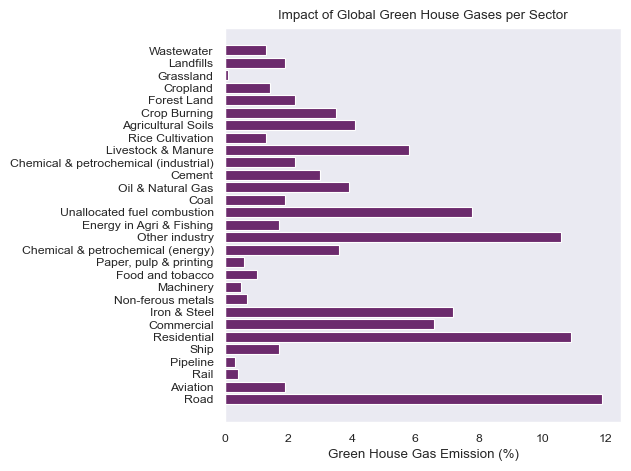

In [240]:
GHG_y = df_GHG['Share of global greenhouse gas emissions (%)']
sub_sector = df_GHG['Sub-sector']

plt.barh(sub_sector, GHG_y, label='All Sectors', color=pal[5])

plt.title("Impact of Global Green House Gases per Sector")
plt.xlabel('Green House Gas Emission (%)')
plt.tight_layout()
plt.show()

### Canada's Mean Greenhouse Gas Emission per sector

In [185]:
df_GHG_Can = pd.read_csv('Data/GHG_Emissions.csv')
df_GHG_Can = df_GHG_Can[df_GHG_Can['Entity'].isin(['Canada'])].drop(['Code'], axis=1)
df_GHG_Can.rename(columns={
'Greenhouse gas emissions from agriculture': 'Agriculture',
'Greenhouse gas emissions from land use change and forestry': 'Forestry',
'Greenhouse gas emissions from waste': 'Waste',
'Greenhouse gas emissions from buildings' : 'Buildings',
'Greenhouse gas emissions from industry':'Industry',
'Greenhouse gas emissions from manufacturing and construction': 'Manufacturing and Construction',
'Greenhouse gas emissions from transport': 'Transport',
'Greenhouse gas emissions from electricity and heat':'Electricity and Heat',
'Fugitive emissions of greenhouse gases from energy production':'Energy Production',
'Greenhouse gas emissions from other fuel combustion':'Fuel Combustion',
'Greenhouse gas emissions from bunker fuels':'Bunker Fuel'}, inplace=True)

In [141]:

df_Current = df_GHG_Can.query('Year == 2020')
df_Current = df_Current.drop(['Entity','Year'], axis=1)
df_Current = df_Current.transpose().reset_index()
df_Current = df_Current.rename(columns={'index': 'Sub-sector', 1022: 'GHG Emission (Tonnes)'})
df_Current


,Sub-sector,GHG Emission (Tonnes)
0,Agriculture,63280000.0
1,Forestry,53840000.0
2,Waste,19010000.0
3,Buildings,73970000.0
4,Industry,21830000.0
5,Manufacturing and Construction,67140000.0
6,Transport,163500000.0
7,Electricity and Heat,194160000.0
8,Energy Production,58070000.0
9,Fuel Combustion,16760000.0


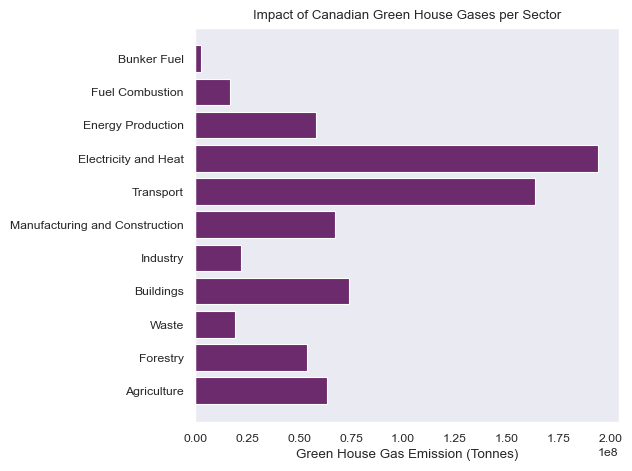

In [230]:
GHG_y = df_Current['GHG Emission (Tonnes)']
sub_sector = df_Current['Sub-sector']

plt.barh(sub_sector, GHG_y, label='All Sectors', color=pal[5])

plt.title("Impact of Canadian Green House Gases per Sector")
plt.xlabel('Green House Gas Emission (Tonnes)')
plt.tight_layout()
plt.show()

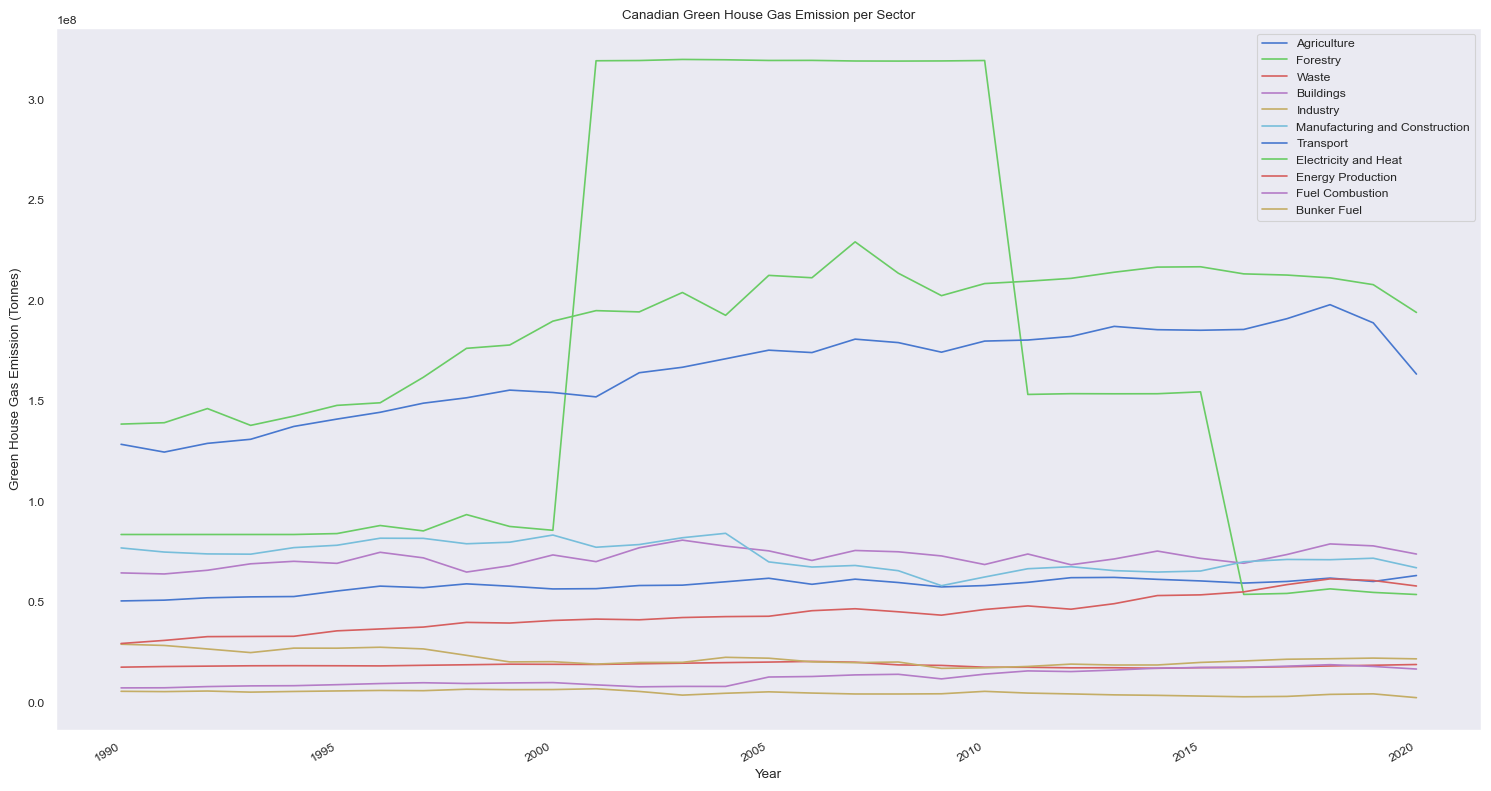

In [239]:
GHG_y = df_GHG_Can.iloc[:, 2:]

fig, ax = plt.subplots(figsize=(15, 8))

ax.plot(df_GHG_Can['Year'], GHG_y)
fig.autofmt_xdate(which='both')

ax.set_title('Canadian Green House Gas Emission per Sector')
ax.set_ylabel('Green House Gas Emission (Tonnes)')
ax.set_xlabel('Year')
ax.legend(['Agriculture', 'Forestry',
           'Waste',
           'Buildings',
           'Industry',
           'Manufacturing and Construction',
           'Transport',
           'Electricity and Heat',
           'Energy Production',
           'Fuel Combustion',
           'Bunker Fuel'])
plt.tight_layout()
plt.show()

## Annual CO2 Emissions of Canada Vs. Each Continent

### Create a subset of the data frame

In [308]:
df_CO2 = pd.read_csv('Data/Annual_CO2_Emissions.csv')
df_compare = df_CO2[df_CO2['Entity'].isin(['Canada','World','Asia','Europe', 'North America', 'Oceania', 'Africa', 'South America'])]
df_compare = df_compare.drop(['Code'], axis=1).query('Year >= 1900 & Year <= 2022').reset_index()
df_compare

,index,Entity,Year,Annual CO₂ emissions (per capita)
0,179,Africa,1900,0.016816
1,180,Africa,1901,0.028121
2,181,Africa,1902,0.041765
3,182,Africa,1903,0.056402
4,183,Africa,1904,0.063418
...,...,...,...,...
979,26329,World,2018,4.785001
980,26330,World,2019,4.770166
981,26331,World,2020,4.464730
982,26332,World,2021,4.654845


### Plot CO2 for each Continent vs Canada

/Users/sjo/miniforge3/envs/playground/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 8322 (\N{SUBSCRIPT TWO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


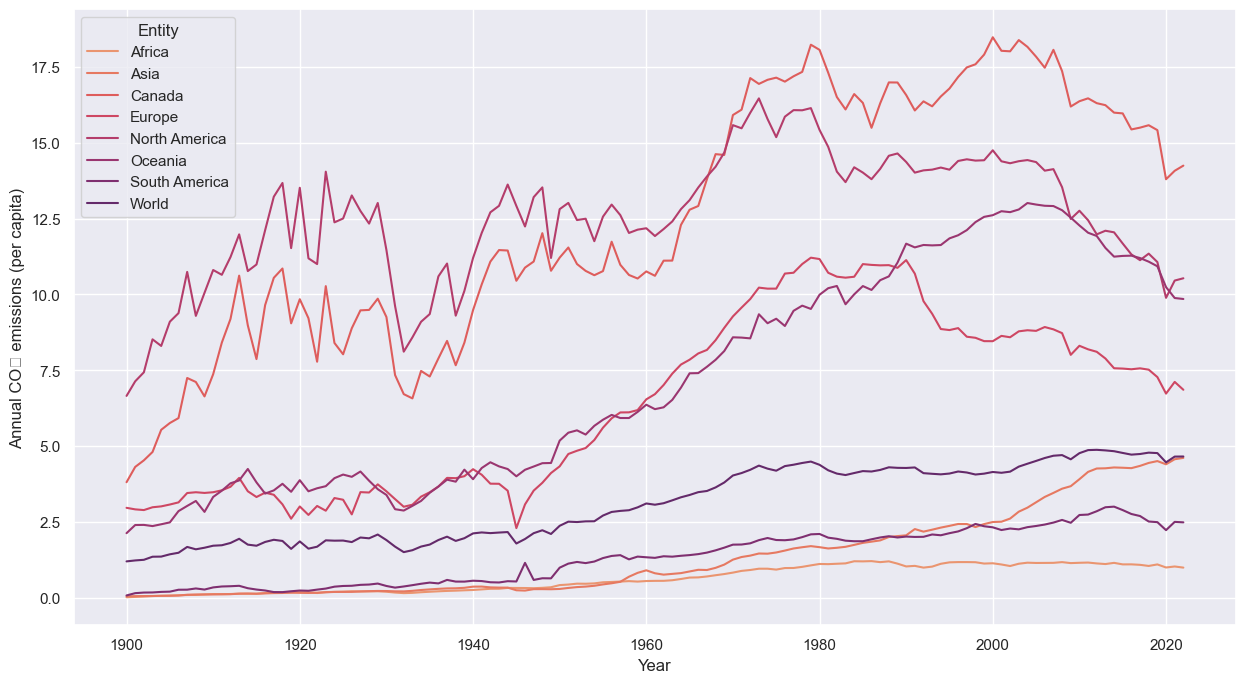

<Figure size 1500x800 with 0 Axes>

In [309]:
sns.set(rc={'figure.figsize': (15, 8)})
timeseries = sns.lineplot(x='Year', y='Annual CO₂ emissions (per capita)',
                          data=df_compare, hue='Entity', palette='flare')
plt.show()
plt.tight_layout(pad=1)
plt.show()

### Box-Plot to Compare Continent vs Canada

/var/folders/8j/09rp00zx1ydb5ybglm3nyhgh0000gn/T/ipykernel_58422/1003622252.py:2: UserWarning: 
The palette list has fewer values (6) than needed (8) and will cycle, which may produce an uninterpretable plot.
  reg = sns.boxplot(x='Entity', y='Annual CO₂ emissions (per capita)',
/Users/sjo/miniforge3/envs/playground/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 8322 (\N{SUBSCRIPT TWO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


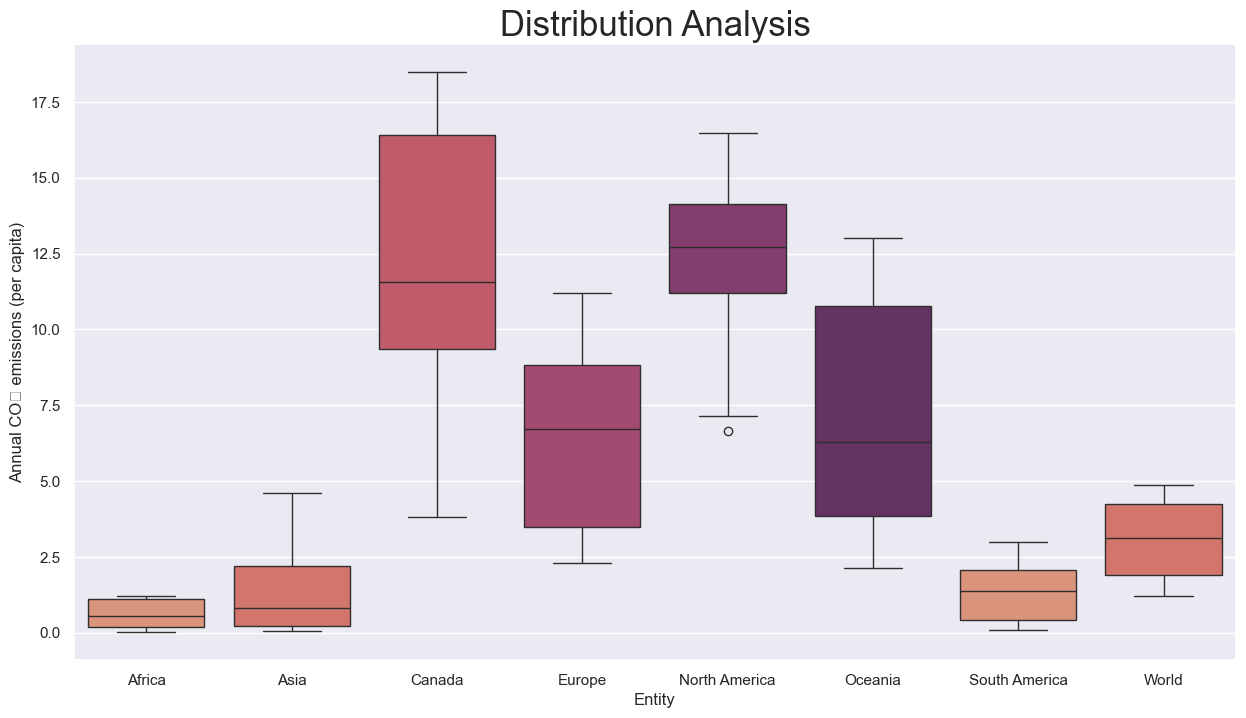

In [310]:
sns.set(rc={'figure.figsize': (15, 8)})
reg = sns.boxplot(x='Entity', y='Annual CO₂ emissions (per capita)',
                  data=df_compare, hue='Entity', palette=pal)
reg.axes.set_title("Distribution Analysis", fontsize=25)

plt.show()